# 1. Linear Regression

### 가상의 데이터로 예측하기

In [1]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다. make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [41]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 10)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [ ]:
data[1]

In [ ]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수
- n_features : 기본값은 100, 독립변수의 수(차원), 정수
- n_target : 기본값은 1, 종속변수의 수, 정수
- bias = 기본값은 0.0, y절편, 실수
- nosie = 기본값은 0.0, 분포

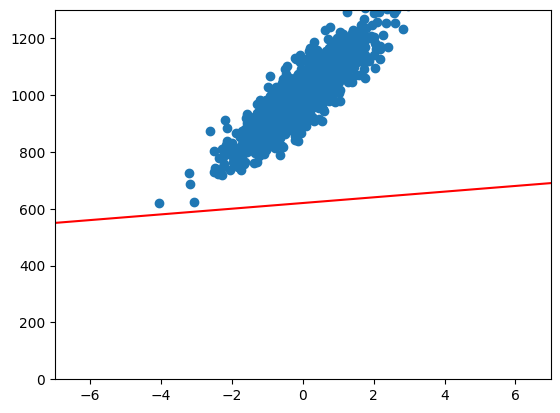

In [21]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.plot([-7, 7], [550, 690], color="red")
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

#### 선형 모델을 만들어 보자.

In [42]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True, random_state=75)

# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

In [31]:
X_train[:5]

array([[-1.51492124],
       [ 0.06090433],
       [-0.19976745],
       [-1.57663179],
       [-0.08838901]])

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용해도 된다.)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [43]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# 단일피쳐 선형회귀 모델의 가설함수는?


y1 = x1의 관계

H(x) = w1*x1 + w0

#### 생성한 모델을 학습시켜보자.

In [44]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# fit 에서 일어나는 일에는 어떤 것들이 있을까?

모델이 학습할 때 일어나는 일들

1. cost 계산  
cost = sum((y_pred - y_real)**2)/N -> MSE
2. 가중치를 업데이트 해준다. (10000)  
for i in range(10000):  
&nbsp;&nbsp;&nbsp;&nbsp;gradientDecent(cost) -> 구한 코스트를 통해 기울기를 계산하고, weight를 기울기 반대방향으로 업데이트


#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [45]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([46.36999892])

In [46]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

999.4689225153845

H(x) = 99.0468476 * x1 + 1000.84959938

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [47]:
print("train data score : {:.4f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.2f}".format(model_linear.score(X_test, y_test)))

train data score : 0.9536
test data score : 0.95


In [ ]:
# Trainset data 와 함께, Hypothesis (직선) 시각화해보기
# Testset data 와 함께, Hypothesis (직선) 시각화해보기

In [56]:
import numpy as np
point_x = np.array([-7, 7]).reshape(-1, 1) # 직선을 만들기 위한 x 값들

In [57]:
model_linear.predict(point_x) # 그것의 예측값

array([ 674.87893007, 1324.05891496])

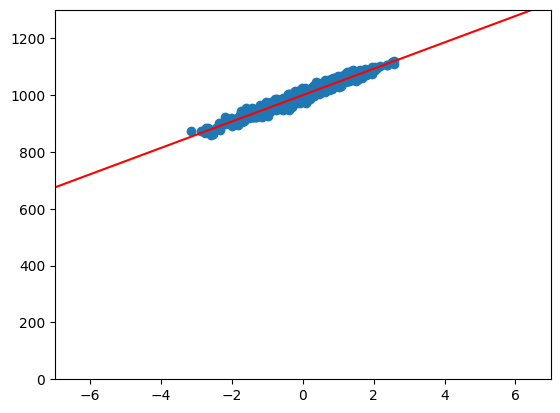

In [58]:
plt.scatter(X_train, y_train)
plt.plot(point_x, model_linear.predict(point_x), color="red")
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

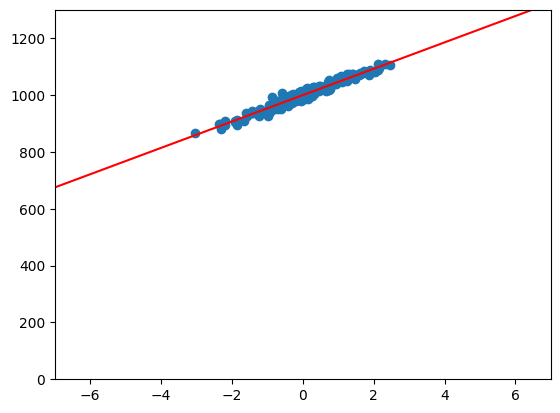

In [59]:
plt.scatter(X_test, y_test)
plt.plot(point_x, model_linear.predict(point_x), color="red")
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predcit() 명령어를 사용하여 y값을 예측합니다.

In [61]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [62]:
mse

104.78723934070814

In [63]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [64]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 104.787, RMSE : 10.237


In [65]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.95


Quiz.
1. 회귀에서 r2 score를 사용하는 이유는 무엇일까?
2. r2_score는 계산하는 식이 어떻게 될까?

Answer.

1. 내가 사용하는 데이터의 분산 정도를 오차에 나눠줌으로써 어느정도 일관된 성능평가 지표로 사용할 수 있기 때문
2. 1 - (오차/분산) => 1 - MSE / Var(y) => 1 - np.mean((y_predict - y_test)**2) / np.var(y_test)

In [67]:
1 - np.mean((y_predict - y_test)**2) / np.var(y_test)

0.9541877394486435

- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.
- 모델의 성능만을 측정할때는 위의 번거로운 과정없이 score함수만을 활용하면 됩니다.

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

In [69]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1].shape, y_multi[:1]))

input data : 
(1, 100), 

 output data : 
[-407.50695598]


여기서는 input data를 살펴보도록 하자.
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [71]:
hypothesis_multi = LinearRegression()

# 가설함수는 어떻게 될까?
# H(x) = w0 + w1x1 + w2x2 + ... + w100x100

In [72]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [74]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_.shape))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
(100,)


bias : 
9.839551546092336


In [75]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.96
검증 데이터 점수 : 0.93


noise = 100

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_2,y_2 = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 100)

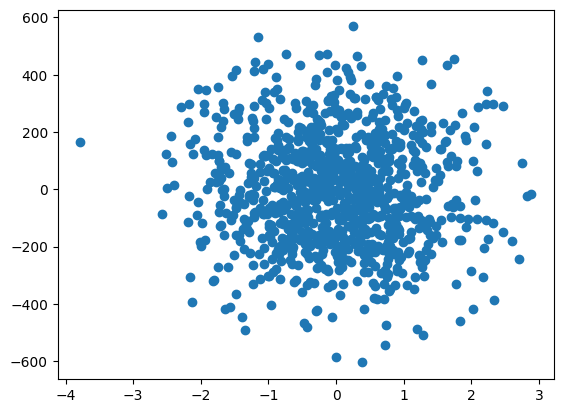

In [82]:
from matplotlib import pyplot as plt
plt.scatter(X_2[:, 11], y_2)
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2,
                                                    shuffle = True)
hypothesis_noise100 = LinearRegression()
model_linear_noise100 = hypothesis_noise100.fit(X_train, y_train)

In [84]:
print('weight : \n{}\n\n'.format(model_linear_noise100.coef_))
print('bias : \n{}'.format(model_linear_noise100.intercept_))

weight : 
[ 3.88137501e+00  4.42567178e-01  1.95060823e+00 -7.54666820e-01
  3.31561125e+00  2.02796100e+00  4.08926144e-01 -2.42154148e+00
 -3.13880984e+00 -2.37167791e+00  1.14405207e-01 -4.33547552e-01
 -4.69407433e+00 -1.34297600e+00 -1.35213044e+00  2.04437380e+00
  6.56383909e-01  1.89704657e+01 -3.82826439e-01 -4.28802122e+00
  3.28023003e+00 -9.09235732e-01 -6.71267094e+00 -3.04095037e+00
  8.49578258e+00  9.80762303e-01  2.81163483e+00 -7.40674758e+00
  5.09191128e+00  1.15454692e+00  9.37167848e+01  2.42408898e+00
 -1.57537283e+00  3.48370233e+00 -1.46555945e+00  6.07378096e+00
  8.02511963e+00 -2.29913896e+00 -2.19892024e+00 -8.76898280e-01
  2.98939968e+00  3.04336628e+00 -3.50871498e+00  9.17599091e-01
  8.13403948e+01  2.72486158e+00  8.19345847e+00 -1.20792944e+00
 -3.17987736e+00  3.45585919e+00  2.27064489e+00 -1.96860940e+00
 -3.91833856e-02  4.34354363e+00  6.75848378e-01  7.42607307e+01
 -3.44158614e+00  4.76169242e+01 -1.87109745e-01  4.51518605e+00
  8.41699314e+0

In [85]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_test, y_test)))

학습 데이터 점수 : 0.75
검증 데이터 점수 : 0.67


make_regression을 이용해 가상 데이터를 생성할 때 noise의 값에 따른 결과를 보여주고 있다.

### 보스턴 주택데이터 예측하기

In [86]:
from sklearn.datasets import load_boston

ImportError: ignored

In [91]:
A = np.array([1,2,3])

In [92]:
B = np.array([4, 5, 6])

In [93]:
np.hstack([A, B]), np.vstack([A, B])

(array([1, 2, 3, 4, 5, 6]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [87]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [88]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
boston = load_boston()
boston

In [ ]:
boston['data']

In [ ]:
boston['target']

In [ ]:
boston['feature_names']

In [ ]:
boston['data'].shape, boston['target'].shape

In [94]:
data.shape, target.shape

((506, 13), (506,))

In [95]:
train_test_split?

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.2,
                                                    shuffle=True)

In [97]:
LinearRegression?

In [98]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.06268770e-01  4.80869678e-02  3.57831552e-02  1.66965189e+00
 -1.79679376e+01  3.47162841e+00  1.06335214e-02 -1.36545951e+00
  3.40317573e-01 -1.32399367e-02 -1.11399094e+00  8.99066623e-03
 -5.69468955e-01]

bias: 41.336982820364376


In [99]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.7433761097458627, 0.7111123894109227)

In [100]:
model_boston.predict(X_test)

array([13.32330337, 28.21482636,  5.90863678, 18.33894074, 30.16208337,
       11.84969322, 18.16308394, 20.98894252, 18.55083108, 22.07468371,
       32.97547053, 22.1194854 , 22.40808339, 20.05039992, 19.79042022,
        6.48124454, 13.81387432, 12.75293632, 32.18925242, 23.53679432,
       15.89521804, 31.82420093, 22.15312926, 41.38850825, 11.62869573,
       20.03333874, 22.08268043, 31.79243947, 26.4706515 , 25.29705097,
       33.11954485, 14.15072601, 27.50952276,  8.64693052, 24.59728589,
       31.02069831, 27.94764223, 16.05703468, 19.77080945, 19.26084578,
       17.36631944, 16.8594444 , 32.93706047, 14.73606974, 21.81362907,
       29.75147807, 22.07466562, 24.59183502, 21.24982518, 30.89640803,
       31.57929971, 35.69968989, 16.33578165, 16.82103456, 15.11715647,
       30.26514486, 27.91356375, 27.91661871, 14.14841117, 22.53024019,
       16.27920388, 27.5661478 ,  3.18900082, 27.61340796, 20.39280802,
       16.76646657, 37.23851512, 25.83455896, 24.89291427, 24.21